In [13]:
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import itertools
import numpy as np
df = pd.read_csv('DATASET_4F.csv')
X = df[['feature 1 ',' feature 2 ',' feature 3 ',' feature 4']]
y = df[' result']
X_train , X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

## SVM

In [14]:
clf = svm.SVC()
df[' result'].value_counts()

1    9000
0    9000
Name:  result, dtype: int64

In [15]:
%%time
clf.fit(X_train, y_train)

Wall time: 3.33 s


SVC()

In [16]:
%%time
y_pred = clf.predict(X_test)

Wall time: 434 ms


In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1767
           1       0.88      0.86      0.87      1833

    accuracy                           0.86      3600
   macro avg       0.86      0.86      0.86      3600
weighted avg       0.86      0.86      0.86      3600



In [18]:
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Normalized confusion matrix
[[0.87323147 0.12676853]
 [0.14348063 0.85651937]]


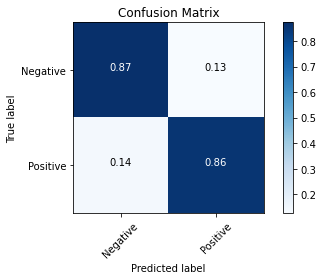

In [19]:
plot_confusion_matrix(confusion_matrix(y_test, y_pred), classes=['Negative','Positive'], title='Confusion Matrix')

## KNN

In [20]:
knn = KNeighborsClassifier(n_neighbors=3)

In [21]:
%%time
knn.fit(X_train, y_train)

Wall time: 19.9 ms


KNeighborsClassifier(n_neighbors=3)

In [22]:
y_test = knn.predict(X_test)

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86      1792
           1       0.87      0.86      0.86      1808

    accuracy                           0.86      3600
   macro avg       0.86      0.86      0.86      3600
weighted avg       0.86      0.86      0.86      3600



Normalized confusion matrix
[[0.86774554 0.13225446]
 [0.13882743 0.86117257]]


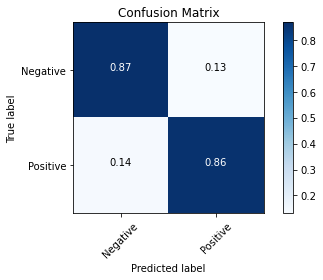

In [24]:
plot_confusion_matrix(confusion_matrix(y_test, y_pred), classes=['Negative','Positive'], title='Confusion Matrix')